<a href="https://colab.research.google.com/github/tumulranjan1/PyTorch-Basics/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch Workflow

Let's explore an example of PyTorch end to end workflow

In [ ]:
what_were_covering =  {1: "data (prepare and load)",
                       2: "build model",
                       3: "Fitting the model to data(training)",
                       4: "Making Predicition",
                       5: "Saving and loading a model",
                       6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'Fitting the model to data(training)',
 4: 'Making Predicition',
 5: 'Saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn #nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

#Checking Pytorch verison
torch.__version__

'1.12.1+cu113'

# 1. Data (Preparing and loading)

Data can be almost anything - 
* Excel Spreadsheets
* Images of any kind
* Videos
* Audio
* DNA
* Text

Machine Learning is a game of two parts

1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula

We'll use a linear regression formula to make a straight line with *known* **parameters**

In [ ]:
# Create *known* parameters 

weights = 0.7
bias = 0.3

# Create 

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weights * X + bias

X[:10],Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(Y)

(50, 50)

### Splitting data into training and test sets (One of the most important concepts in Machine Learning in general)

Let's create a training and test set with our data

In [ ]:
# Create a train-test split

train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [ ]:
X_train, Y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0

## How might be better visualise our data

This is where the data explorer's motto comes in

# "Visualize!"

In [ ]:
def plot_prediction(train_data=X_train,
                    train_label=Y_train,
                    test_data=X_test,
                    test_labels=Y_test,
                    predictions=None):
  """
  Plots training data, test data and compare predictions.
  """
  
  plt.figure(figsize=(10, 7))

  #Plot training data in blue
  plt.scatter(train_data,train_label,c="b", s=4, label="Training data")

  #Plot test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Test Data")

  #Are there predicitons?
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")


  #Show the legend
  plt.legend(prop={"size":14});


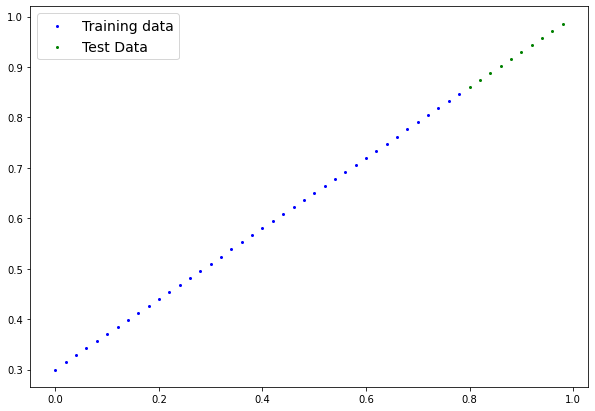

In [ ]:
plot_prediction()

## 2. Building model

Our first PyTorch model

What our Model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so?

Through two main algo:
1. Gradient Descent
2. Back propogation

In [ ]:
# Create Linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module):  # <- Almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    #Forward method to define the computation in the model
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.weights*x + self.bias # This is the linear regression formula

### Pytorch model building essentials

* `torch.nn` - contains all of the buildings for computational graphs(a neural network can be considered a computational graph)
* `torch.nn.Paramenter` - What parameters should our model try and learn, often a PyTorch layer from torch.nn will set this for us
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite forward
* `torch.optim` - The place for all optimizers in PyTorch, help with gradient descent
* `def forward()` - All nn.Module subclasses require you to overwrite forward

### Checking the contents of our PyTorch Model

Now we've create a model, let's see what's inside....

So we can check out our Model Parameters or what's inside our model using `.parameters()`



In [ ]:
# Create a random seed

torch.manual_seed(42)

# Create an instance of the model (this is the subclass of nn.Module)

model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Listing name parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weights, bias

(0.7, 0.3)

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts Y_test based on X_test

When we pass data through our model, its going to run it through the `forward()` method

In [ ]:
# Make Predictions with model

with torch.inference_mode():
  y_preds = model_0(X_test)

# You can also do something similar with torch.no_grad(), however, inference mode is preffered

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
Y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

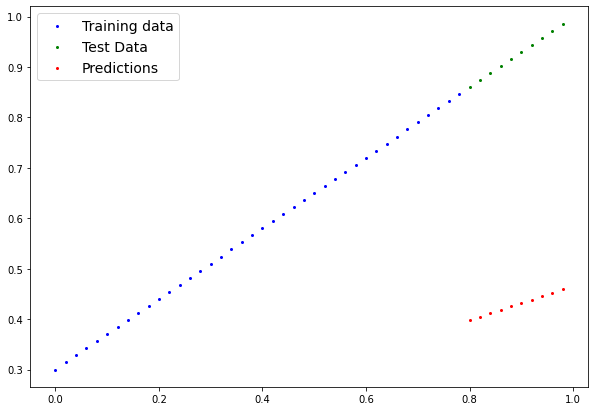

In [ ]:
plot_prediction(predictions=y_preds)

### Train mode
The whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.

Or in other words, from a poor representation of data to better representation of data

One way to measure how poor or how wrong your model's prediction are, is to use a loss function

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:
* **Loss Function** : A function to measure how wrong you model's predictions are to the ideal outputs, lower is better.

* **Optimizer** : Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias in our case to improve the loss function.)

And specifically for PyTorch, we need
* Training loop
* Testing loop

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)       #lr = learning rate = possible the most important learning hyper parameter you can set


### Building a training and testing loop in PyTorch

A couple of things we need in a training loop :

0. Loop through the data
1. forward pass (this involves data moving through our model's `forward()` function to make predictions on data - also called forward propogation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and remove our loss (**gradient descent**)


In [ ]:
torch.manual_seed(42)
# An epoch is one loop through the data..(this is a hyperparameter because we've set it ourselves)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

### Training 
# 0. Loop through the data
for epoch in range(epochs):  # Pass the data through the model
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to requre gradients
  
  # 1. Forward pass
  y_pred = model_0(X_train) # Pass the data through the model, this will perform the forward() method located within the model object

  # 2. Calculating loss
  loss = loss_fn(y_pred,Y_train) 

  # 3. Optimizer zero grad
  optimizer.zero_grad() # 

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer
  optimizer.step() # by default how the optimizer changes will accumulate through the loop so we have to zero them above step 3 for the next iteration of the loop

  ### Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode():
     # 1. Forward pass
     test_pred = model_0(X_test)

     # 2. Calculate the loss
     test_loss = loss_fn(test_pred, Y_test)
  # Ayo there's a hell lot going on we need to print what's going on
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch:{epoch} | Loss: {loss} | Test loss : {test_loss}")
    print(model_0.state_dict())

Epoch:0 | Loss: 0.31288138031959534 | Test loss : 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10 | Loss: 0.1976713240146637 | Test loss : 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20 | Loss: 0.08908725529909134 | Test loss : 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30 | Loss: 0.053148526698350906 | Test loss : 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40 | Loss: 0.04543796554207802 | Test loss : 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50 | Loss: 0.04167863354086876 | Test loss : 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60 | Loss: 0.03818932920694351 | Test loss : 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [ ]:
np.array(torch.tensor(loss_values).numpy()), test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

Text(0.5, 0, 'Epochs')

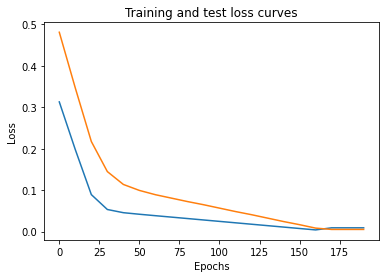

In [ ]:

plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train Loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")


In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

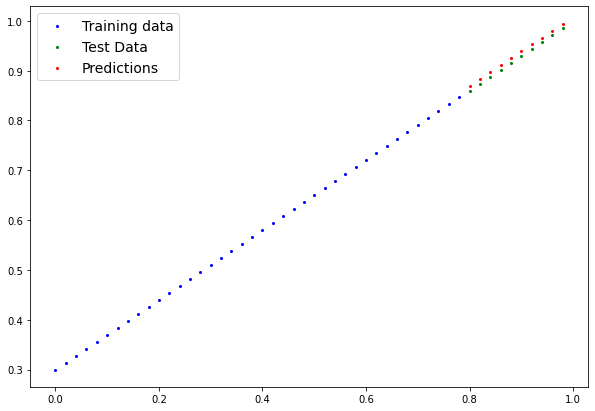

In [ ]:
plot_prediction(predictions=y_preds_new)

## Saving a model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format 
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

In [ ]:
# Saving our PyTorch model

from pathlib import Path

# 1. Create model's directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create Model save path
MODEL_NAME = "01_PyTorch_Workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state_dict
print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving Model to: models/01_PyTorch_Workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1063 Oct 30 15:38 01_PyTorch_Workflow_model_0.pth


## Loading a PyTorch Model
Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the `state_dict()` into that

In [ ]:
# To load in a saved state_dict() we have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated paramters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Make some predictions with our loaded model

loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# Compare loaded model preds with original model preds 

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])